In [189]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.style.use('ggplot')    

In [108]:
sr = pd.read_csv('data/simpsons_ratings.csv')

In [109]:
sr.tail()

,Unnamed: 0,_id,number,title,user_rating,user_votes
1223,1223,58f7f345c88a6544474fdde5,28.15,The Cad and the Hat,6.3,176
1224,1224,58f7f345c88a6544474fdde6,28.16,Kamp Krustier,6.6,157
1225,1225,58f7f345c88a6544474fdde7,28.17,22 for 30,6.6,166
1226,1226,58f7f345c88a6544474fdde8,28.18,A Father's Watch,6.9,144
1227,1227,58f7f345c88a6544474fdde9,28.19,The Caper Chase,5.9,128


In [110]:
sr_clean = sr.iloc[:,2:]

In [111]:
sr_clean['season'] = sr_clean['number']

In [112]:
seasons = pd.Series(range(1, 29))

In [113]:
sr_clean.shape

(1228, 5)

In [114]:
episode_df = sr_clean.number.astype(str).str.split('.', expand=True)

In [115]:
episode_df.columns = ['season', 'ep']
episode_df['season'] = episode_df.season.astype('int')
episode_df['ep'] = episode_df.ep.astype('int')

In [116]:
episode_df.shape

(1228, 2)

In [117]:
sr_clean['season'] = episode_df.season

In [118]:
sr_clean['ep'] = episode_df.ep

In [119]:
sr_clean.shape

(1228, 6)

In [122]:
ratings = sr_clean.drop_duplicates()

In [134]:
#get num episodes per season
eps_per_season = ratings.groupby(['season']).count().number

In [138]:
# season_starts
ep_starts = list(np.cumsum(eps_per_season))
ep_starts = ep_starts[:-1];

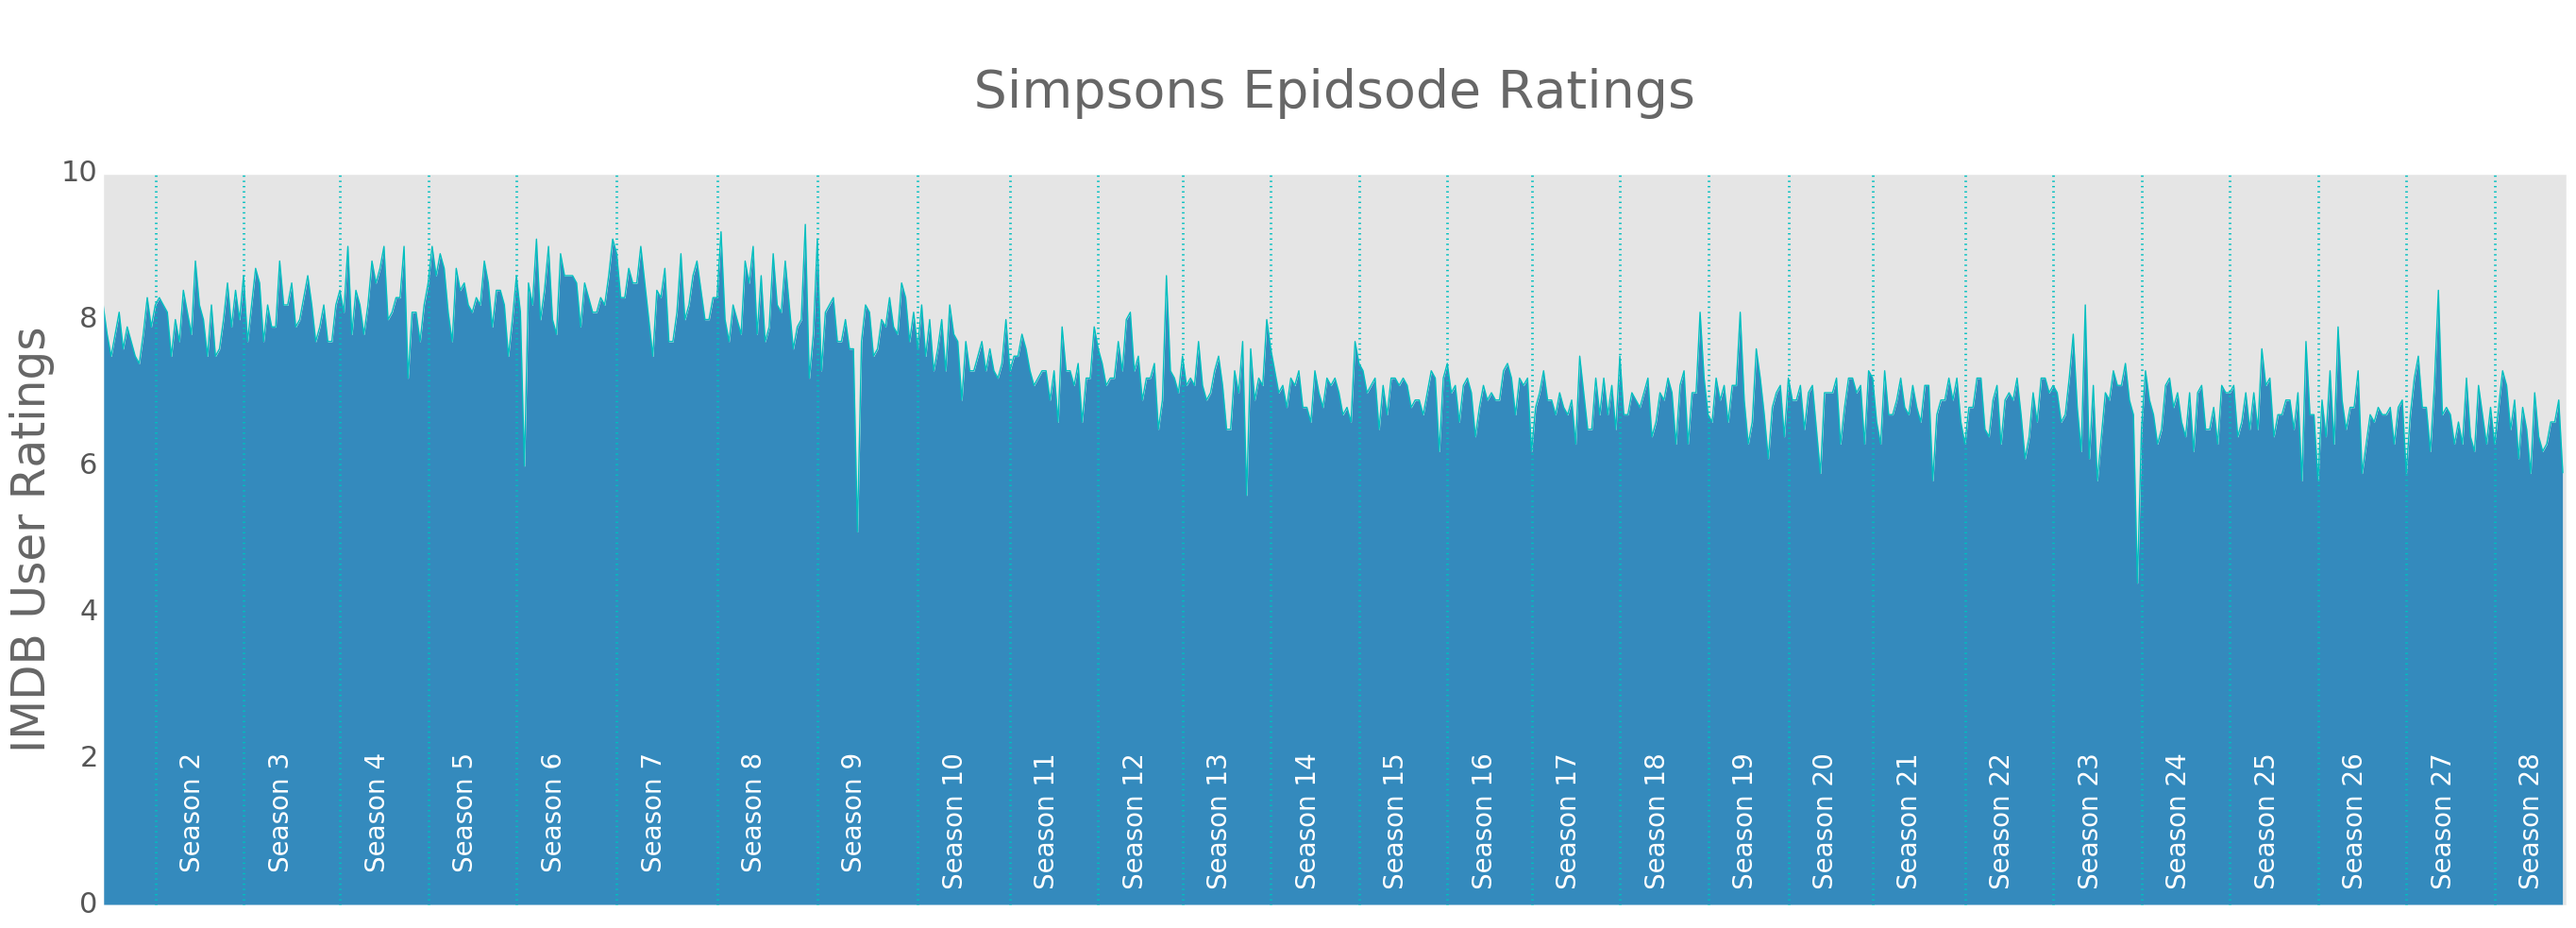

NameError: name 'fig' is not defined

In [212]:
_, ax = plt.subplots(figsize=(30, 10))
ax.plot(ratings.index, ratings.user_rating,linewidth=1, color = 'c')
ax.set_xlim(0, 614)
ax.set_ylim(0, 10)
ax.set_ylabel('IMDB User Ratings', fontsize=35, color='0.4')
ax.yaxis.grid(False)
ax.tick_params(axis='y', labelsize = 22)
ax.set_title('\n Simpsons Epidsode Ratings \n', fontsize=40, color='0.4')
for i, num in enumerate(ep_starts):
    plt.axvline(x=num, color='c', linestyle=':',linewidth = 2)
    label = 'Season ' + str(i+2)
    plt.text(num + 6, 1.8,label,rotation=90, fontsize=20, color = 'w')
ax.get_xaxis().set_visible(False)
ax.fill_between(ratings.index, ratings.user_rating)
plt.show()